# Normalization of the count data with visualization via PCA and heatmaps

Normalization Method: TPM and log +1

Note: The Heatmap shows only the top 10% most expressive genes

Lade TPM-Daten für Brandao_MCCM_full_raw_counts_marked...
Lade TPM-Daten für Finstrlova_Newman_full_raw_counts_marked...
Lade TPM-Daten für Guegler_T4_minusToxIN_full_raw_counts_marked...
Lade TPM-Daten für Guegler_T7_plusToxIN_full_raw_counts_marked...
Lade TPM-Daten für Lood_full_raw_counts_marked...
Lade TPM-Daten für Sprenger_VC_WT_VP882_delta_cpdS_full_raw_counts_marked...
Lade TPM-Daten für Yang_full_raw_counts_marked...
Erzeuge PCA für Brandao_MCCM_full_raw_counts_marked...


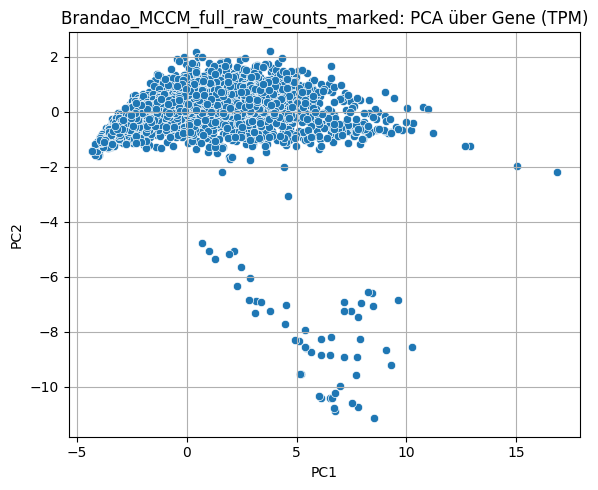

Erzeuge Heatmap für Brandao_MCCM_full_raw_counts_marked...


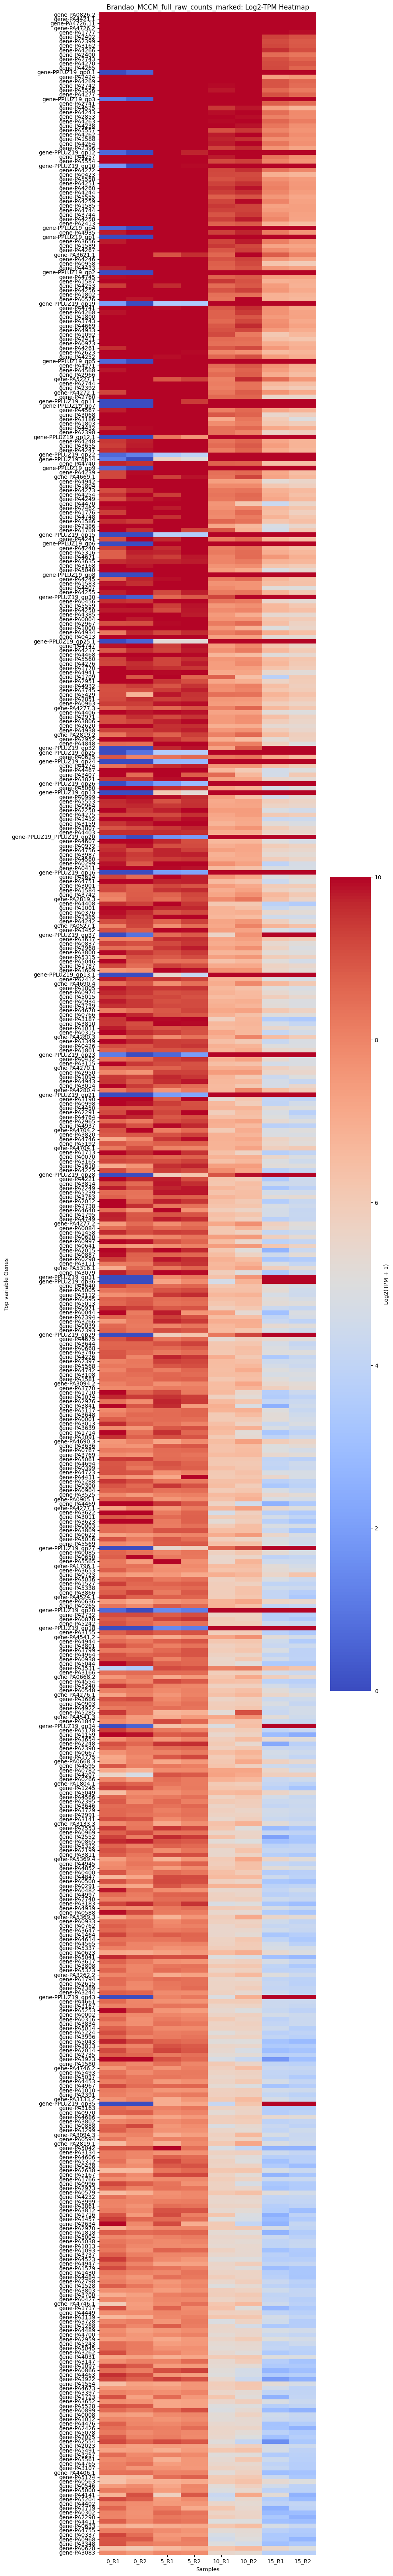

Erzeuge PCA für Finstrlova_Newman_full_raw_counts_marked...


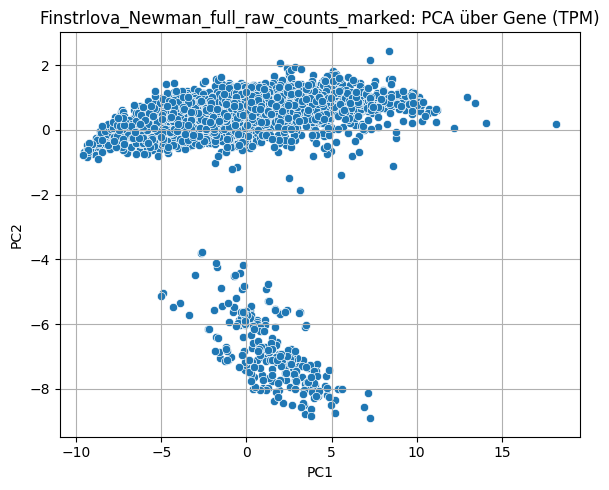

Erzeuge Heatmap für Finstrlova_Newman_full_raw_counts_marked...


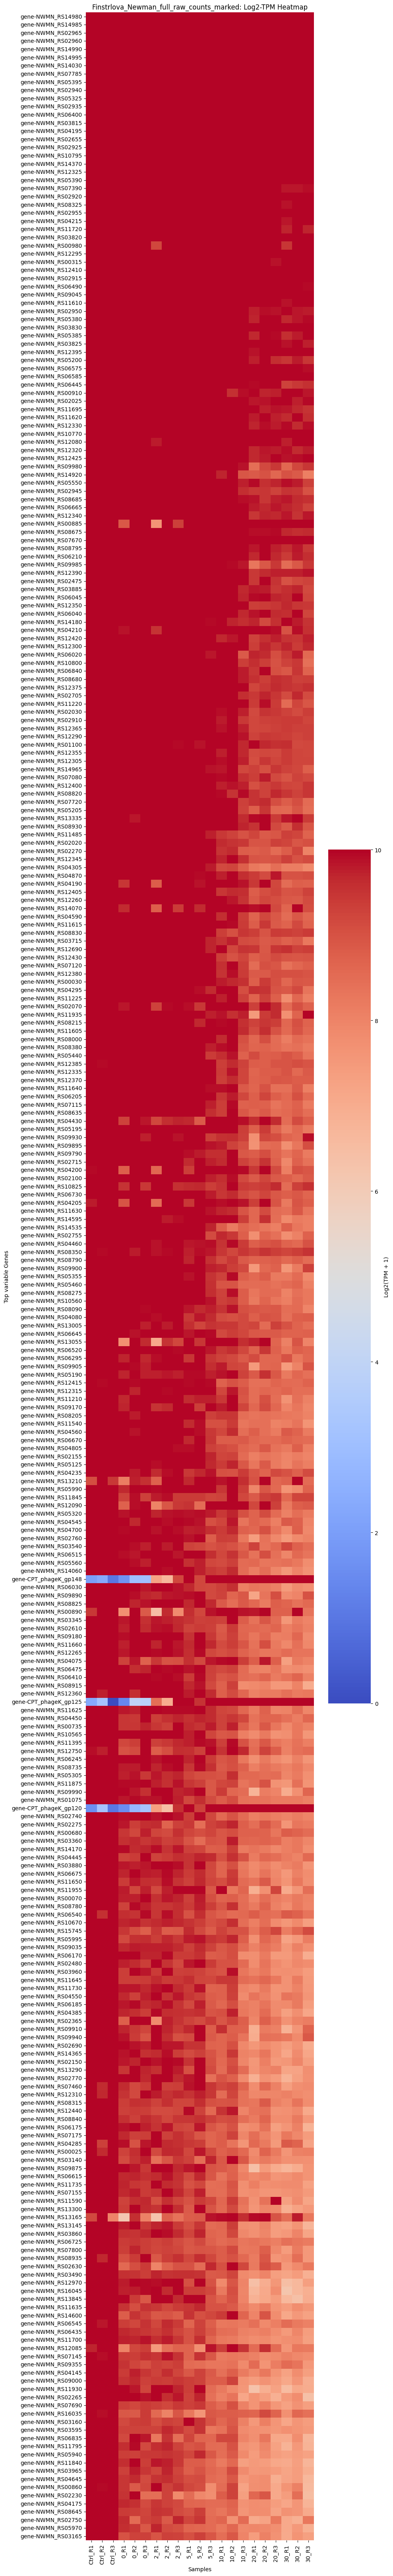

Erzeuge PCA für Guegler_T4_minusToxIN_full_raw_counts_marked...


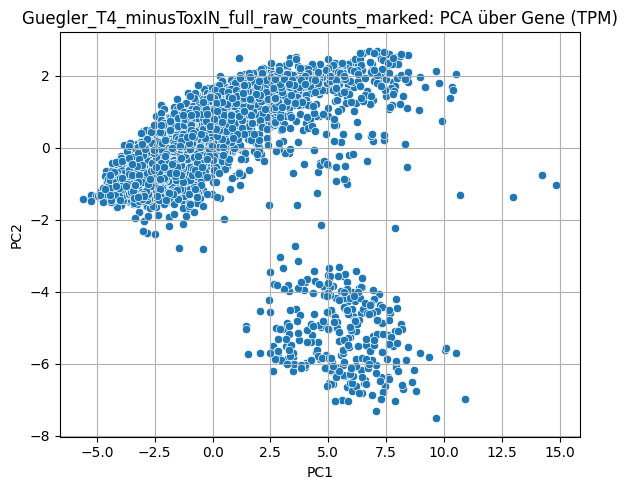

Erzeuge Heatmap für Guegler_T4_minusToxIN_full_raw_counts_marked...


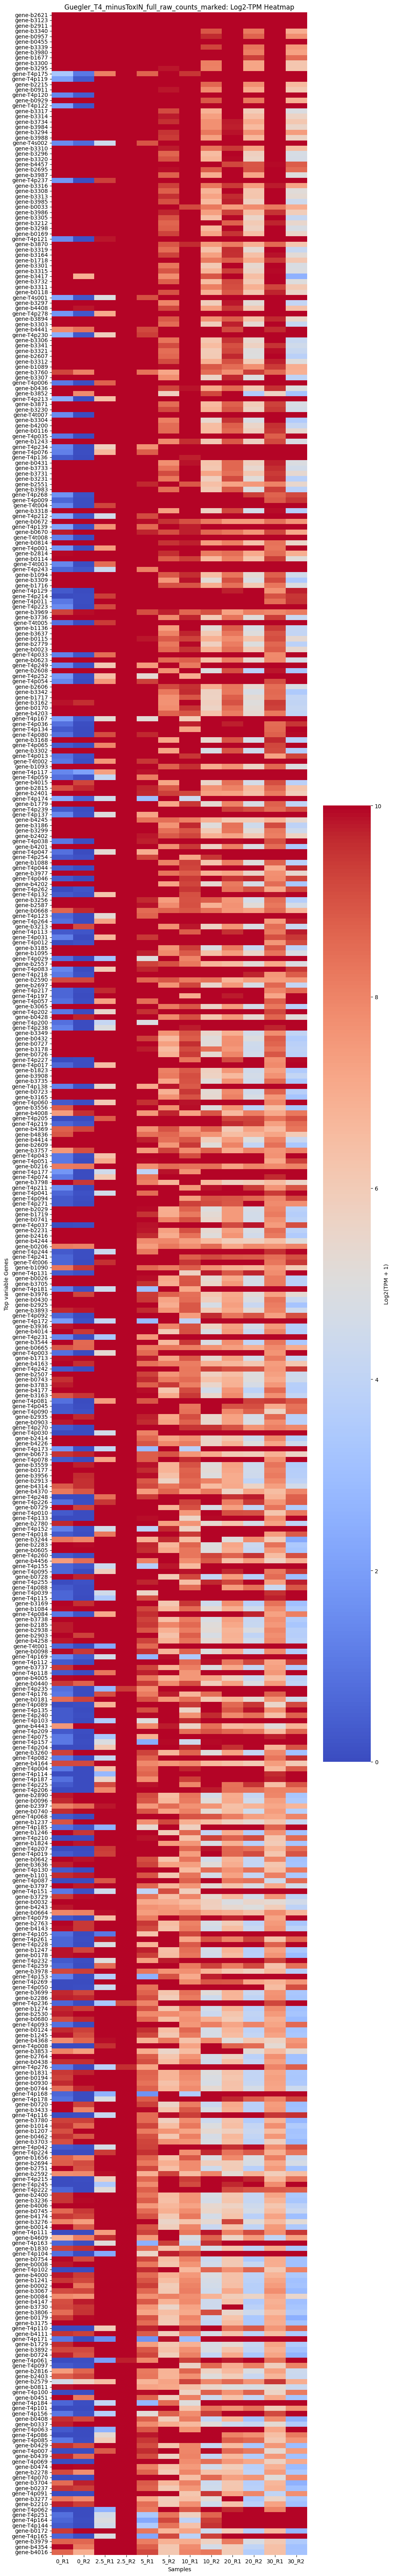

Erzeuge PCA für Guegler_T7_plusToxIN_full_raw_counts_marked...


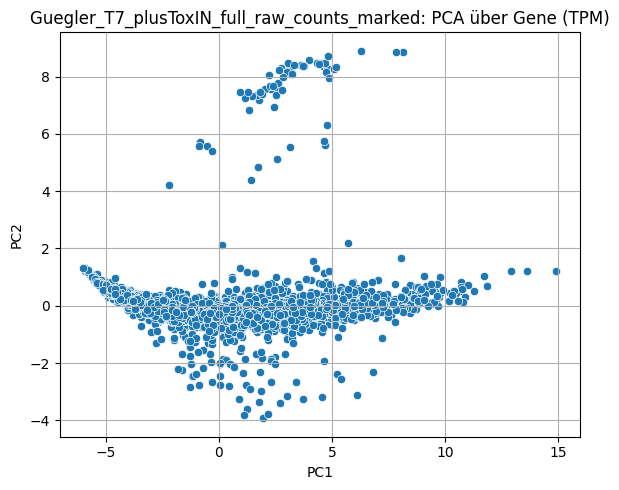

Erzeuge Heatmap für Guegler_T7_plusToxIN_full_raw_counts_marked...


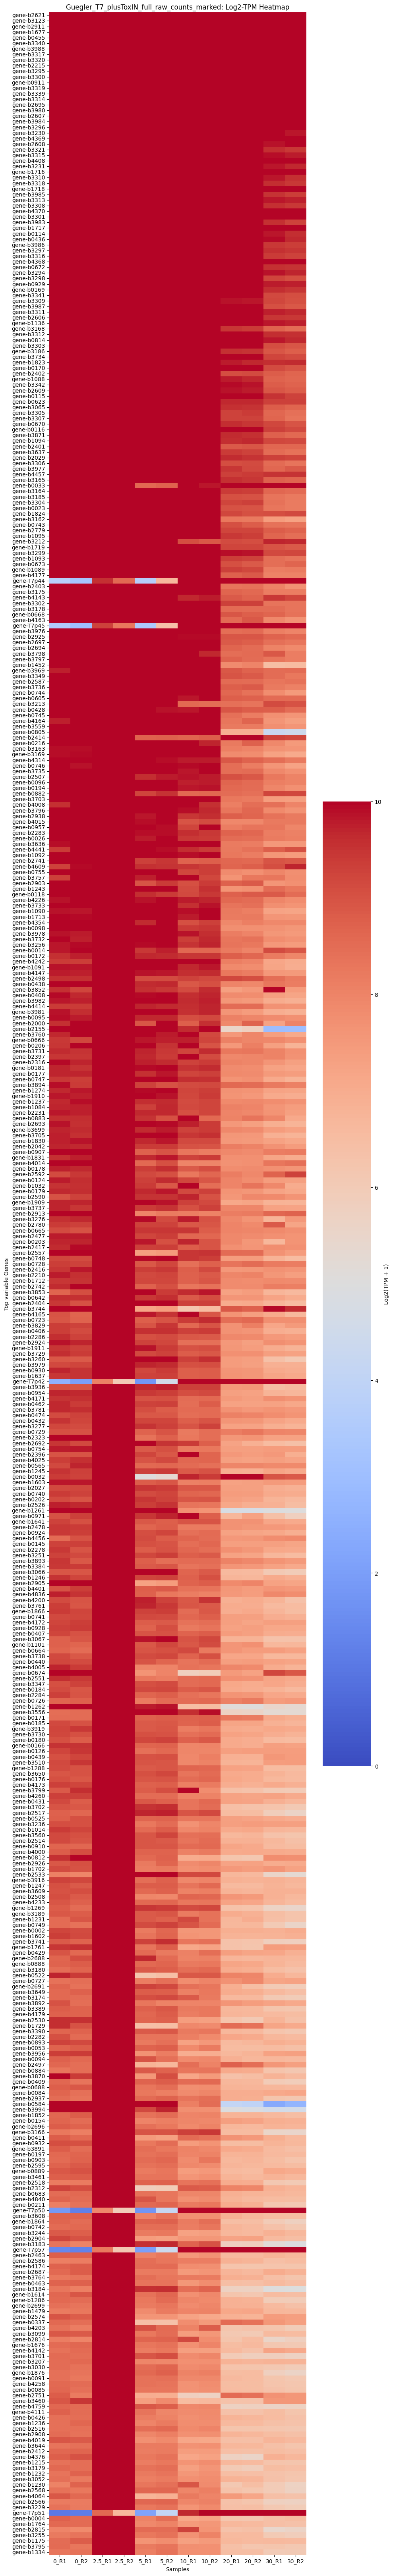

Erzeuge PCA für Lood_full_raw_counts_marked...


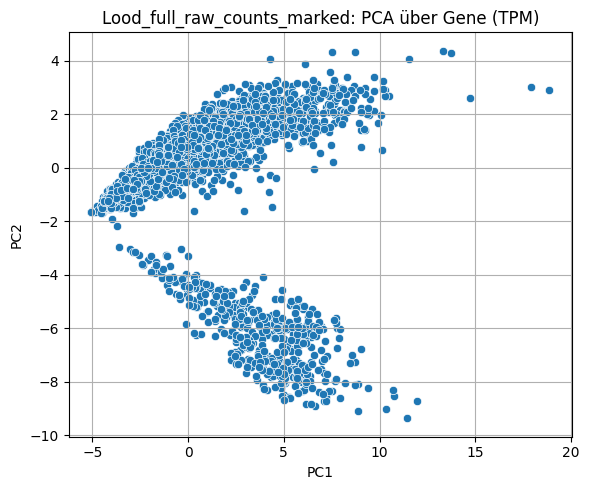

Erzeuge Heatmap für Lood_full_raw_counts_marked...


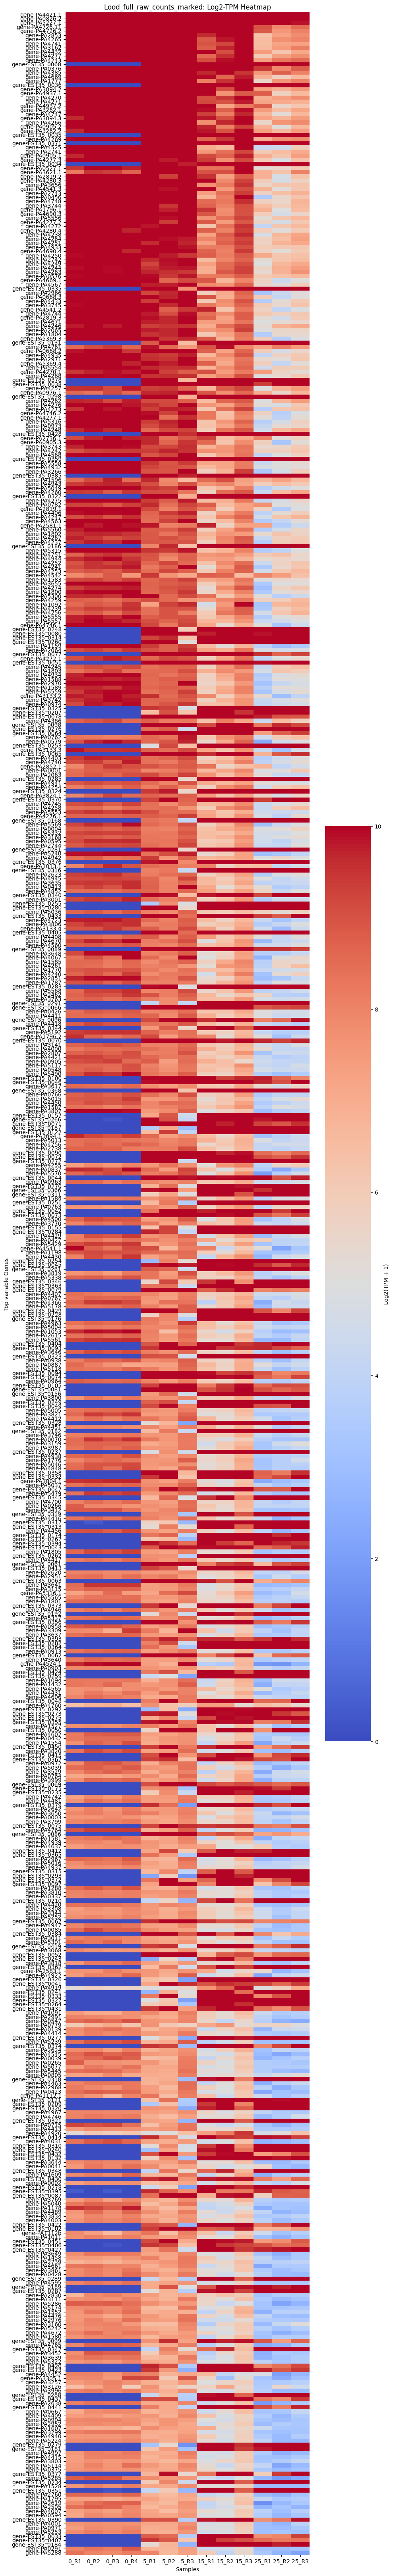

Erzeuge PCA für Sprenger_VC_WT_VP882_delta_cpdS_full_raw_counts_marked...


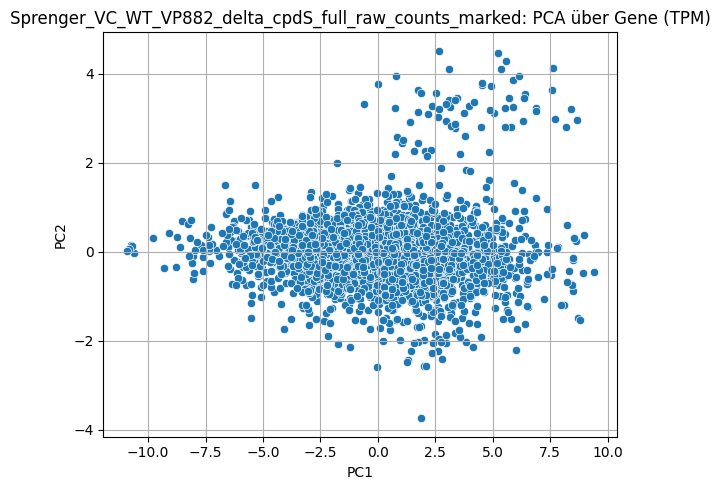

Erzeuge Heatmap für Sprenger_VC_WT_VP882_delta_cpdS_full_raw_counts_marked...


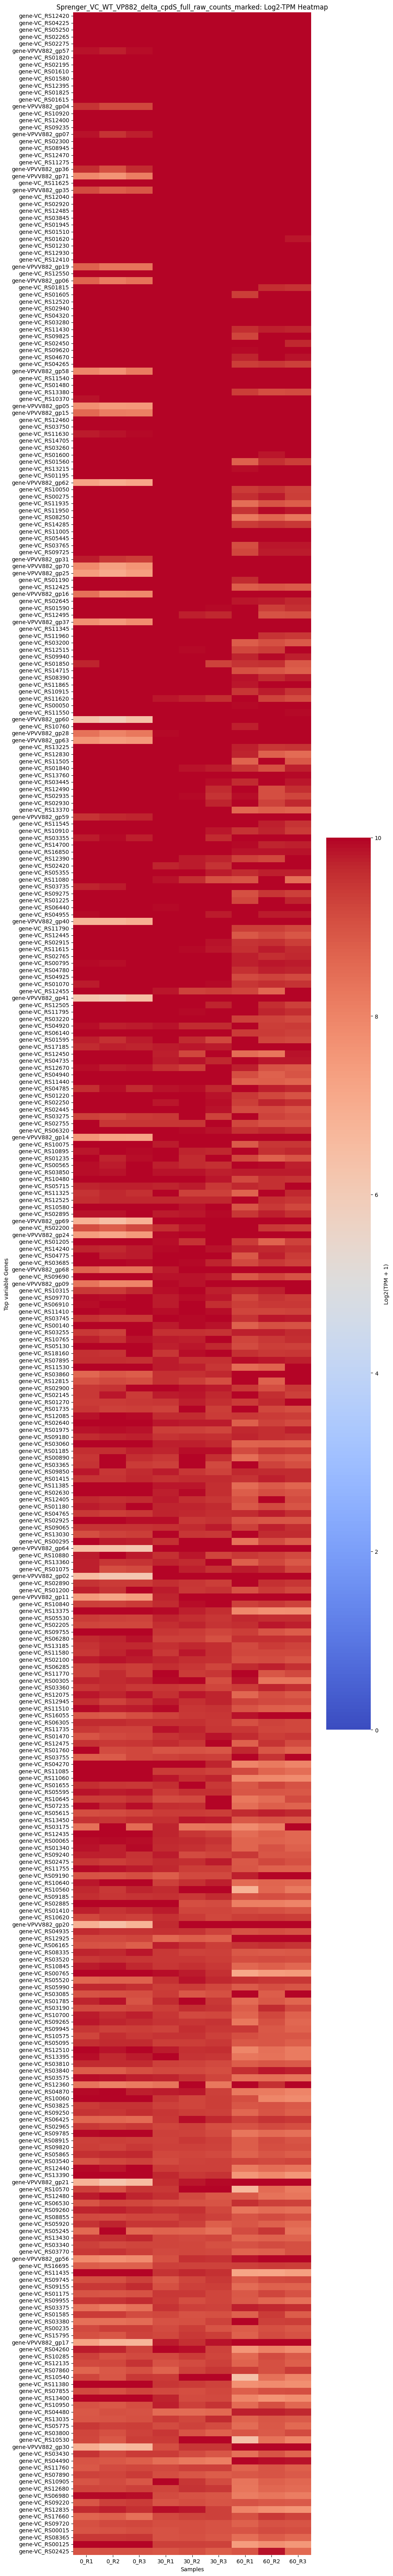

Erzeuge PCA für Yang_full_raw_counts_marked...


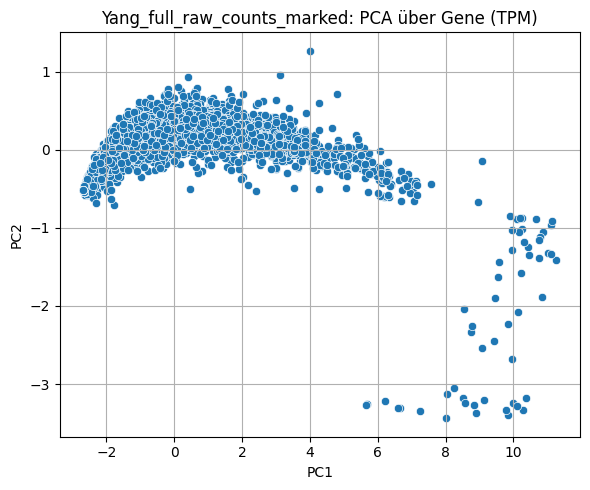

Erzeuge Heatmap für Yang_full_raw_counts_marked...


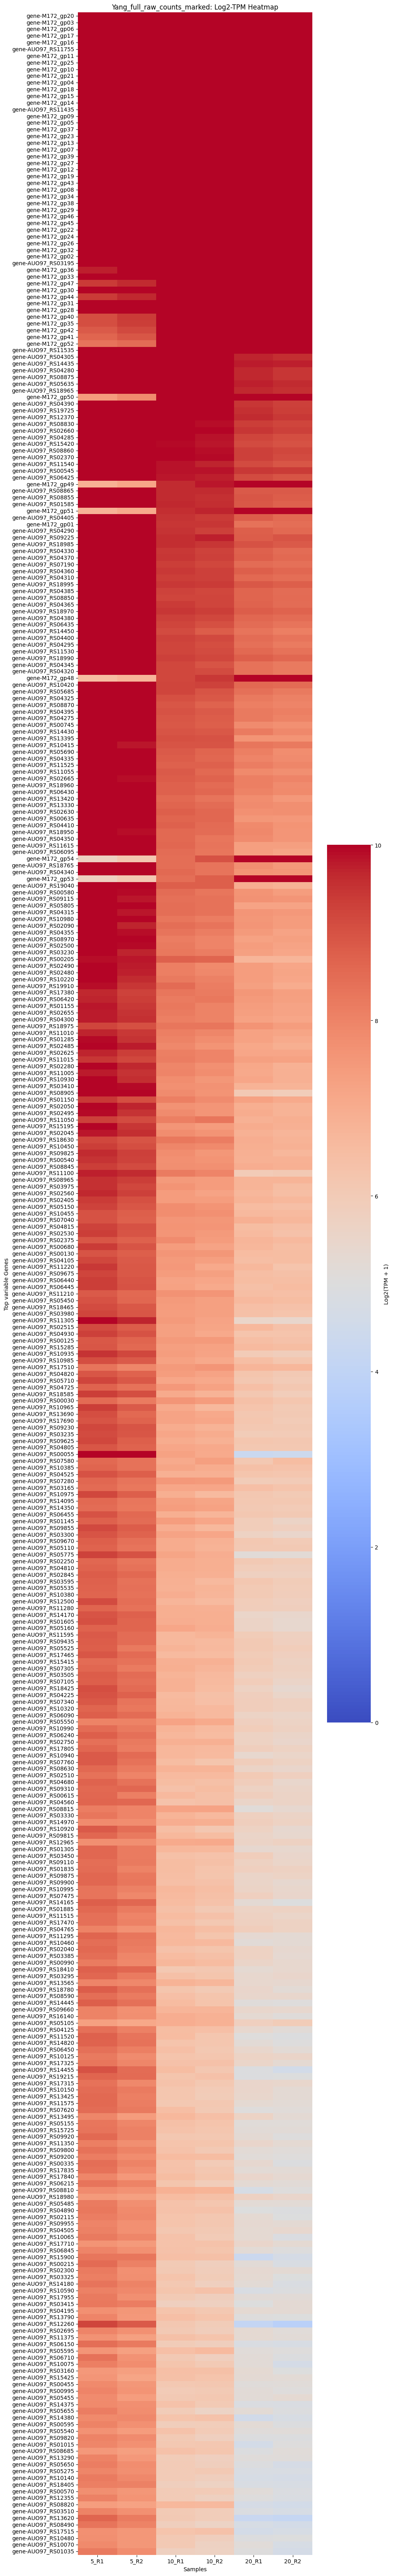

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# === Pfade zu den TPM-normalisierten Datensätzen ===
path_normalized = "../data/datasets_normalized"
files = [f for f in os.listdir(path_normalized) if f.endswith("_tpm.tsv")]

# === TPM-Daten laden ===
def load_tpm(path):
    df = pd.read_csv(path, sep="\t")
    df = df.set_index("Geneid")
    
    # Nur numerische Spalten behalten UND die letzten drei spezifisch ausschließen
    unwanted_cols = {"relative changes", "negligible changes", "Outlier"}
    df = df[[col for col in df.columns if col not in unwanted_cols and pd.api.types.is_numeric_dtype(df[col])]]
    
    return df


datasets = {}
for file in files:
    dataset_name = file.replace("_tpm.tsv", "")
    print(f"Lade TPM-Daten für {dataset_name}...")
    datasets[dataset_name] = load_tpm(os.path.join(path_normalized, file))

# === Heatmap-Funktion ===
def plot_heatmap(tpm_df, title, method="sum"):
    # TPM-Werte log2-transformieren
    tpm_log = np.log2(tpm_df + 1)
    
    # Auswahl der wichtigsten Gene basierend auf Summe oder Varianz der Expression
    if method == "sum":
        gene_scores = tpm_log.sum(axis=1)
    elif method == "variance":
        gene_scores = tpm_log.var(axis=1)
    else:
        raise ValueError("Methode muss 'sum' oder 'variance' sein.")
    
    # Top 10% 
    top_genes = gene_scores.sort_values(ascending=False).head(int(len(gene_scores) / 10)).index
    data = tpm_log.loc[top_genes]

    plt.figure(figsize=(10, 65))
    sns.heatmap(data, cmap="coolwarm", vmin=0, vmax=10, center=5,
                yticklabels=True, xticklabels=True, cbar_kws={'label': 'Log2(TPM + 1)'})
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Top variable Genes")
    plt.tight_layout()
    plt.show()

# === PCA-Plot Funktion ===
def plot_pca_genes(tpm_df, title):
    data = np.log2(tpm_df + 1)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    
    pca = PCA(n_components=2)
    components = pca.fit_transform(scaled)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=components[:, 0], y=components[:, 1])
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Visualisierung aller geladenen Datensätze ===
for name, df in datasets.items():
    print(f"Erzeuge PCA für {name}...")
    plot_pca_genes(df, f"{name}: PCA über Gene (TPM)")

    print(f"Erzeuge Heatmap für {name}...")
    plot_heatmap(df, f"{name}: Log2-TPM Heatmap")